In [ ]:
!pip install pyspark


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Pertemuan_9").getOrCreate()

data = [
    ('James', 34, 'L', 3000, 1),
    ('Anna', 28, 'P', 4100, 2),
    ('Lee', 23, 'L', 2700, 1)
]
kolom = ['Nama', 'Umur', 'Jenis_Kelamin', 'Gaji', 'DeptId']

df = spark.createDataFrame(data, schema=kolom)

df.createOrReplaceTempView('pegawai')

df_semua = spark.sql('SELECT * FROM pegawai')
df_semua.show()
df_disaring = spark.sql('SELECT Nama, Umur FROM pegawai WHERE Gaji > 3000')
df_disaring.show()
df_rata_gaji = spark.sql('SELECT AVG(Gaji) as RataGaji FROM pegawai')
df_rata_gaji.show()


+-----+----+-------------+----+------+
| Nama|Umur|Jenis_Kelamin|Gaji|DeptId|
+-----+----+-------------+----+------+
|James|  34|            L|3000|     1|
| Anna|  28|            P|4100|     2|
|  Lee|  23|            L|2700|     1|
+-----+----+-------------+----+------+

+----+----+
|Nama|Umur|
+----+----+
|Anna|  28|
+----+----+

+------------------+
|          RataGaji|
+------------------+
|3266.6666666666665|
+------------------+



In [ ]:
df_total_gaji = spark.sql('''
    SELECT Jenis_Kelamin, SUM(Gaji) as TotalGaji, Umur
    FROM pegawai
    GROUP BY Jenis_Kelamin, Umur
    ORDER BY Umur
''')
df_total_gaji.show()


+-------------+---------+----+
|Jenis_Kelamin|TotalGaji|Umur|
+-------------+---------+----+
|            L|     2700|  23|
|            P|     4100|  28|
|            L|     3000|  34|
+-------------+---------+----+



In [ ]:

data_lengkap = [
    ('James', 34, 'L', 3000, 1),
    ('Anna', 28, 'P', 4100, 2),
    ('Lee', 23, 'L', 2700, 1),
    ('Maria', 40, 'P', 5000, 1),
    ('John', 30, 'L', 3200, 2)
]
df_lengkap = spark.createDataFrame(data_lengkap, schema=kolom)
df_lengkap.createOrReplaceTempView('pegawai')

df_ranking = spark.sql('''
    SELECT DeptId, Nama, Gaji,
    RANK() OVER (PARTITION BY DeptId ORDER BY Gaji DESC) as Peringkat
    FROM pegawai
''')
df_ranking.show()


+------+-----+----+---------+
|DeptId| Nama|Gaji|Peringkat|
+------+-----+----+---------+
|     1|Maria|5000|        1|
|     1|James|3000|        2|
|     1|  Lee|2700|        3|
|     2| Anna|4100|        1|
|     2| John|3200|        2|
+------+-----+----+---------+



+----+--------+
|Umur|RataGaji|
+----+--------+
|  23|  2700.0|
|  28|  4100.0|
|  30|  3200.0|
|  34|  3000.0|
|  40|  5000.0|
+----+--------+



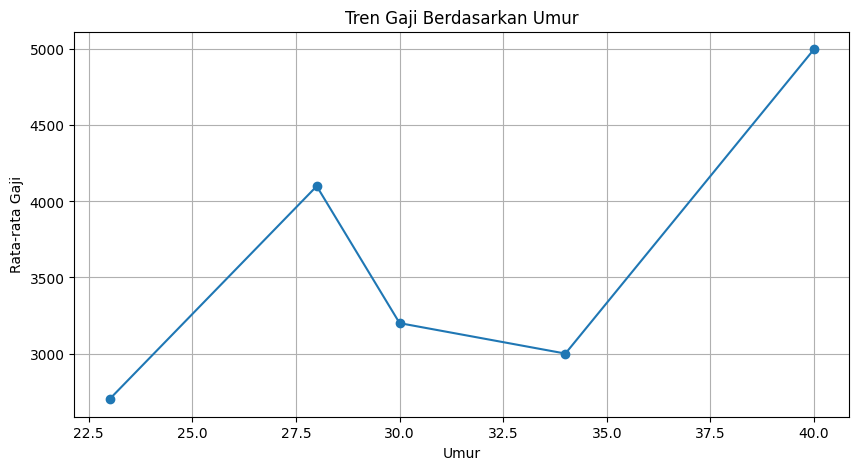

In [ ]:
df_tren_gaji = spark.sql('''
    SELECT Umur, AVG(Gaji) as RataGaji
    FROM pegawai
    GROUP BY Umur
    ORDER BY Umur
''')
df_tren_gaji.show()

# Visualisasi tren gaji
import matplotlib.pyplot as plt
df_tren_gaji_pandas = df_tren_gaji.toPandas()
plt.figure(figsize=(10, 5))
plt.plot(df_tren_gaji_pandas['Umur'], df_tren_gaji_pandas['RataGaji'], marker='o')
plt.xlabel('Umur')
plt.ylabel('Rata-rata Gaji')
plt.title('Tren Gaji Berdasarkan Umur')
plt.grid(True)
plt.show()


+------+---------+--------------+
|DeptId|TotalGaji|JumlahKaryawan|
+------+---------+--------------+
|     1|    10700|             3|
|     2|     7300|             2|
+------+---------+--------------+



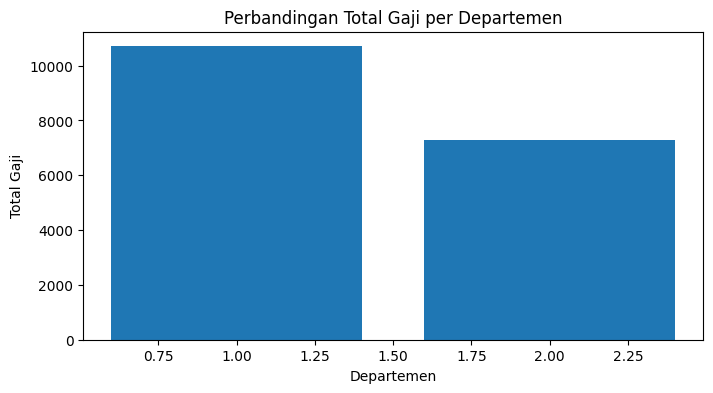

In [ ]:
df_total_per_dept = spark.sql('''
    SELECT DeptId, SUM(Gaji) as TotalGaji, COUNT(Nama) as JumlahKaryawan
    FROM pegawai
    GROUP BY DeptId
''')
df_total_per_dept.show()
df_total_per_dept_pandas = df_total_per_dept.toPandas()
plt.figure(figsize=(8, 4))
plt.bar(df_total_per_dept_pandas['DeptId'], df_total_per_dept_pandas['TotalGaji'])
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')
plt.title('Perbandingan Total Gaji per Departemen')
plt.show()


+-----+----+----+
| Nama|Umur|Gaji|
+-----+----+----+
| Anna|  28|4100|
|Maria|  40|5000|
+-----+----+----+



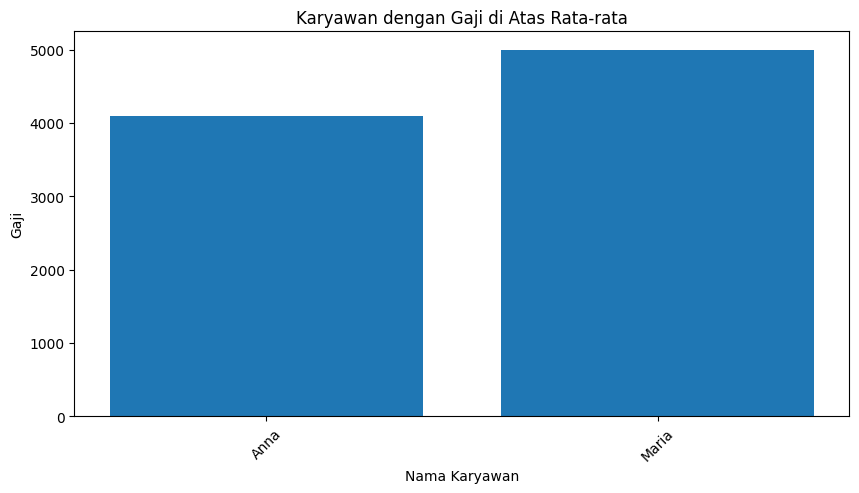

In [ ]:
df_gaji_diatas_rata = spark.sql('''
    SELECT Nama, Umur, Gaji
    FROM pegawai
    WHERE Gaji > (SELECT AVG(Gaji) FROM pegawai)
    ORDER BY Umur
''')
df_gaji_diatas_rata.show()
df_gaji_diatas_rata_pandas = df_gaji_diatas_rata.toPandas()
plt.figure(figsize=(10, 5))
plt.bar(df_gaji_diatas_rata_pandas['Nama'], df_gaji_diatas_rata_pandas['Gaji'])
plt.xlabel('Nama Karyawan')
plt.ylabel('Gaji')
plt.title('Karyawan dengan Gaji di Atas Rata-rata')
plt.xticks(rotation=45)
plt.show()


+------+--------+--------------+
|DeptId|RataGaji|JumlahKaryawan|
+------+--------+--------------+
|     1|  4000.0|            25|
|     2|  4000.0|            25|
|     3|  4000.0|            25|
|     4|  4000.0|            25|
+------+--------+--------------+



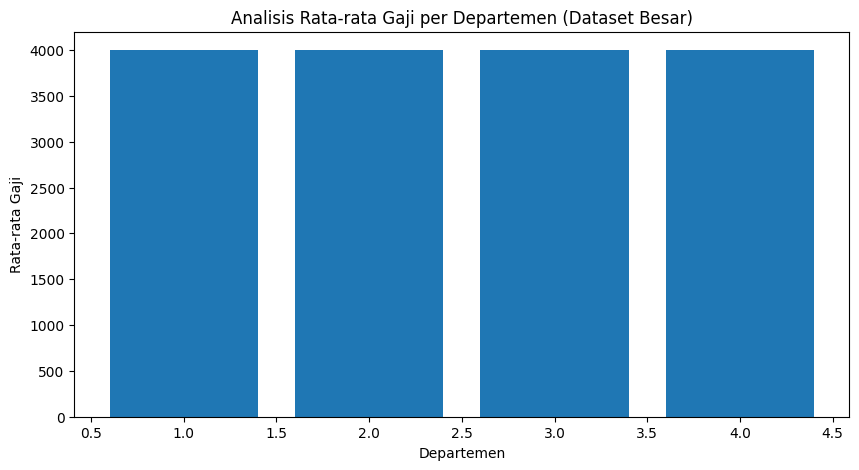

In [ ]:
data_besar = [
    ('Karyawan' + str(i), 20 + i % 30, 'L' if i % 2 == 0 else 'P', 3000 + (i % 5) * 500, (i % 4) + 1)
    for i in range(1, 101)
]
df_besar = spark.createDataFrame(data_besar, schema=kolom)
df_besar.createOrReplaceTempView('pegawai_besar')

df_analisis_besar = spark.sql('''
    SELECT DeptId, AVG(Gaji) as RataGaji, COUNT(Nama) as JumlahKaryawan
    FROM pegawai_besar
    GROUP BY DeptId
    ORDER BY DeptId
''')
df_analisis_besar.show()

df_analisis_besar_pandas = df_analisis_besar.toPandas()
plt.figure(figsize=(10, 5))
plt.bar(df_analisis_besar_pandas['DeptId'], df_analisis_besar_pandas['RataGaji'])
plt.xlabel('Departemen')
plt.ylabel('Rata-rata Gaji')
plt.title('Analisis Rata-rata Gaji per Departemen (Dataset Besar)')
plt.show()
